# Decision Tree Classifier
## Machine Learning Model Training and Evaluation

In [48]:
import pandas as pd

In [49]:
# training df 
df_train = pd.read_csv('../../data/train/customer_churn_dataset-training-clean.csv')
#test df 
df_test = pd.read_csv('../../data/test/customer_churn_dataset-testing-clean.csv')

In [50]:
# training data setting fitting variables and predictor
X_train = df_train[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_train = df_train['churn']

# test data setting fitting variables and predictor
X_test = df_test[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_test = df_test['churn']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353644, 10)
(151562, 10)
(353644,)
(151562,)


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
#dtC = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
#dtC.fit(X_train, y_train)

In [53]:
dtC = DecisionTreeClassifier(max_depth= 3, class_weight='balanced', random_state=42)

In [54]:
dtC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [55]:
'''attempting SMOTE to reduce class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
dtC.fit(X_train_resampled, y_train_resampled)'''

'attempting SMOTE to reduce class imbalance\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\ndtC.fit(X_train_resampled, y_train_resampled)'

In [56]:
from sklearn.model_selection import cross_val_score
dtC_train_cv_scores = cross_val_score(dtC, X_train, y_train, cv=5)
print("Cross-validation Train scores:", dtC_train_cv_scores)

Cross-validation Train scores: [0.87921503 0.88010576 0.87872019 0.87908779 0.88023131]


In [57]:
dtC_test_cv_scores = cross_val_score(dtC, X_test, y_test, cv=5)
print("Cross-validation Test scores:", dtC_test_cv_scores)

Cross-validation Test scores: [0.87892983 0.87982054 0.88047638 0.87760623 0.87724334]


In [58]:
dtC_test_score = dtC.score(X_test, y_test)
print("Test score:", dtC_test_score)

Test score: 0.8788152703184176


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dtC.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     67414
           1       0.90      0.88      0.89     84148

    accuracy                           0.88    151562
   macro avg       0.88      0.88      0.88    151562
weighted avg       0.88      0.88      0.88    151562

[[59113  8301]
 [10066 74082]]


## Decision Tree Classifier HyperParam

In [60]:
from sklearn.pipeline import Pipeline


In [61]:
pipe = Pipeline(steps=[
    ('scaler', None),
    ('estimator', DecisionTreeClassifier(class_weight='balanced')),  
])

In [62]:
from sklearn.model_selection import RandomizedSearchCV


In [63]:
params = {
    'estimator__max_depth': [5, 10],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [2, 5],
    'estimator__max_features': ['sqrt', None]
}

dtC_rs = RandomizedSearchCV(pipe, params, scoring='roc_auc', n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=3)
dtC_rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV 3/3] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=2;, score=0.926 total time=   0.6s
[CV 2/3] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=5;, score=0.905 total time=   0.6s
[CV 1/3] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=5;, score=0.901 total time=   0.6s
[CV 1/3] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=2;, score=0.906 total time=   0.6s
[CV 3/3] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=5;, score=0.885 total time=   0.7s
[CV 2/3] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=2;, score=0.927 total time=   0.7s
[CV 2/3] END estimator__max_

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', None),
                                             ('estimator',
                                              DecisionTreeClassifier(class_weight='balanced'))]),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 10],
                                        'estimator__max_features': ['sqrt',
                                                                    None],
                                        'estimator__min_samples_leaf': [2, 5],
                                        'estimator__min_samples_split': [2, 5]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [64]:
print('best random cv estimator', dtC_rs.best_estimator_)
print('best random cv roc_auc score', dtC_rs.best_score_)
print('best random cv params' , dtC_rs.best_params_)

best random cv estimator Pipeline(steps=[('scaler', None),
                ('estimator',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=5))])
best random cv roc_auc score 0.9519598921140521
best random cv params {'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 5, 'estimator__max_features': None, 'estimator__max_depth': 10}


In [65]:
best_dtc= dtC_rs.best_estimator_
y_pred = best_dtc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     67414
           1       0.90      0.99      0.94     84148

    accuracy                           0.93    151562
   macro avg       0.94      0.93      0.93    151562
weighted avg       0.94      0.93      0.93    151562

[[57894  9520]
 [  617 83531]]


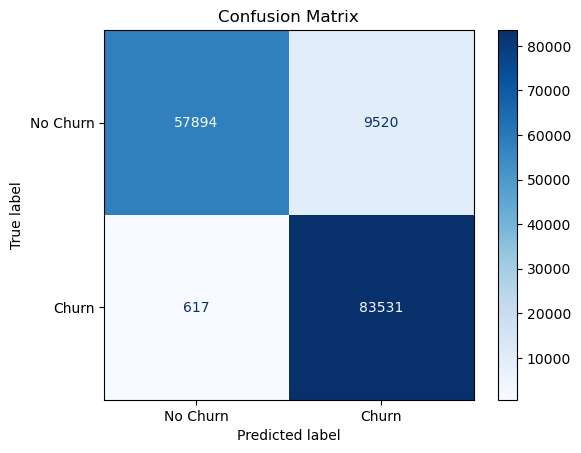

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_visual = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
cm_visual.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

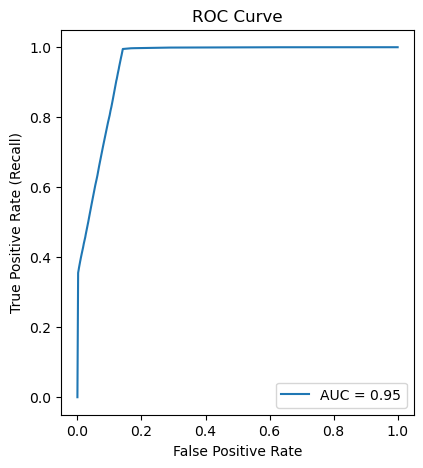

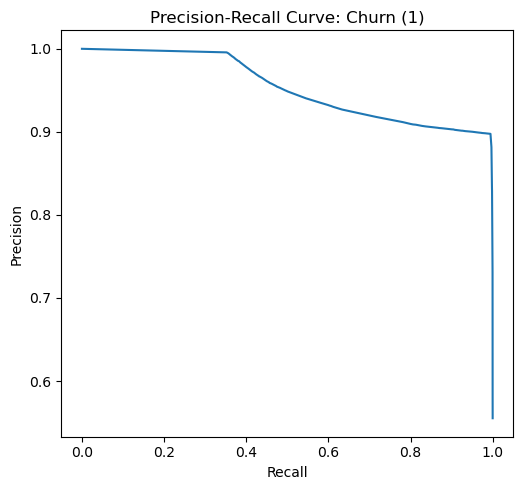

In [72]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

## churn precision recall
probability = best_dtc.predict_proba(X_test)[:, 1]  # churn probabilities
fpr, tpr, roc_thresholds = roc_curve(y_test, probability)
precision, recall, pr_thresholds = precision_recall_curve(y_test, probability)

# ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall curve
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Churn (1)')

plt.tight_layout() 

             Feature  Importance
4      support_calls    0.399606
8        total_spend    0.232604
7    contract_length    0.129172
0                age    0.098895
5      payment_delay    0.096115
9   last_interaction    0.030186
1             gender    0.006582
2             tenure    0.004400
3    usage_frequency    0.002171
6  subscription_type    0.000269


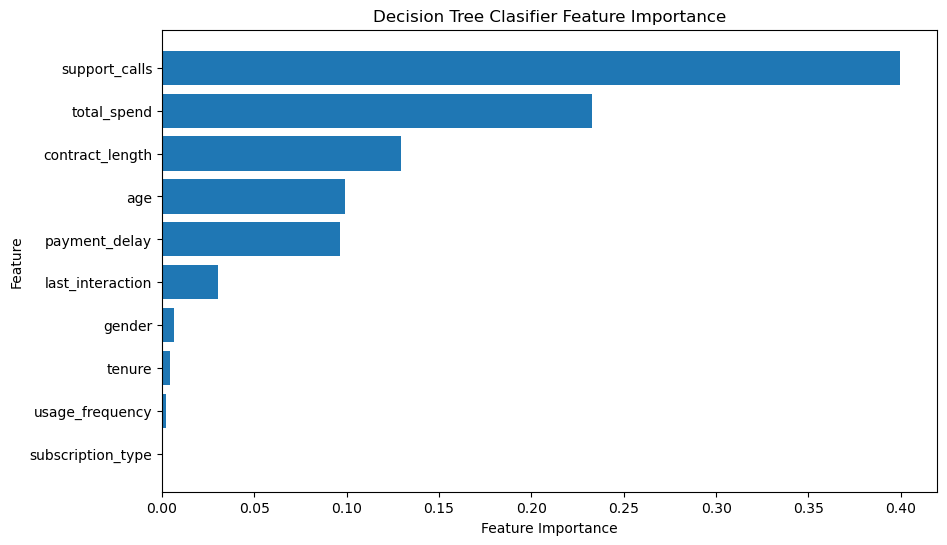

In [68]:
# Access the best estimator's Classifier
best_dtC = dtC_rs.best_estimator_.named_steps['estimator']

# Get feature importances
importances = best_dtC.feature_importances_

# Map to feature names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance_df.head(10))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Clasifier Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [69]:
import yaml

params = best_dtc.get_params()

with open('../../models/FINAL_trained_model_02_DecisionTreeClass.yml', 'w') as yaml_file:
    yaml.dump(params, yaml_file, default_flow_style=False)


In [ ]:
import pickle

# Save the best model
with open('../../models/trained_model_02_DecisionTreeClass.pkl', 'wb') as f:
    pickle.dump(best_dtC, f)